In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('..')
# import dezero
from dezero import cuda
import dezero.core as C
import dezero.functions as F
import dezero.layers as L
from dezero import DataLoader
from dezero.models import Sequential
from dezero.optimizers import Adam
from dezero.models import Model

use_gpu = cuda.gpu_enable

print(use_gpu)



True


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image
# # import dezero
# from dezero.core import Parameter
# import dezero.functions as F
# from dezero import Variable
# from dezero.models import VGG16, Model
# from dezero import utils
# from dezero import optimizers
# from dezero import no_grad


# use_gpu = cuda.gpu_enable
# lr = 5.0
# # iterations = 2001
# iterations = 10
# model_input_size = (224, 224)
# style_weight = 1.0
# content_weight = 1e-4
# total_varitaion_weight = 1e-6
# content_layers = ['conv5_2']
# style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1', 'conv5_1']
# content_url = 'https://github.com/oreilly-japan/deep-learning-from-scratch-3/raw/images/zebra.jpg'
# style_url = 'https://raw.githubusercontent.com/jcjohnson/neural-style/master/examples/inputs/starry_night_google.jpg'


# class VGG16(VGG16):
#     def extract(self, x):
#         c1_1 = F.relu(self.conv1_1(x))
#         c1_2 = F.relu(self.conv1_2(c1_1))
#         p1 = F.average_pooling(c1_2, 2, 2)
#         c2_1 = F.relu(self.conv2_1(p1))
#         c2_2 = F.relu(self.conv2_2(c2_1))
#         p2 = F.average_pooling(c2_2, 2, 2)
#         c3_1 = F.relu(self.conv3_1(p2))
#         c3_2 = F.relu(self.conv3_2(c3_1))
#         c3_3 = F.relu(self.conv3_3(c3_2))
#         p3 = F.average_pooling(c3_3, 2, 2)
#         c4_1 = F.relu(self.conv4_1(p3))
#         c4_2 = F.relu(self.conv4_2(c4_1))
#         c4_3 = F.relu(self.conv4_3(c4_2))
#         p4 = F.average_pooling(c4_3, 2, 2)
#         c5_1 = F.relu(self.conv5_1(p4))
#         c5_2 = F.relu(self.conv5_2(c5_1))
#         c5_3 = F.relu(self.conv5_3(c5_2))
#         return {'conv1_1':c1_1, 'conv1_2':c1_2, 'conv2_1':c2_1, 'conv2_2':c2_2,
#                 'conv3_1':c3_1, 'conv3_2':c3_2, 'conv3_3':c3_3, 'conv4_1':c4_1,
#                 'conv5_1':c5_1, 'conv5_2':c5_2, 'conv5_3':c5_3}

# # Setup for content & style image
# content_path = utils.get_file(content_url)
# style_path = utils.get_file(style_url)
# content_img = Image.open(content_path)
# content_size = content_img.size
# style_img = Image.open(style_path)
# content_img = VGG16.preprocess(content_img, size=model_input_size)[np.newaxis]  # preprocess for VGG
# style_img = VGG16.preprocess(style_img, size=model_input_size)[np.newaxis]
# content_img, style_img = Variable(content_img), Variable(style_img)

# model = VGG16(pretrained=True)
# #gen_data = np.random.uniform(-20, 20, (1, 3, img_resize[0], img_resize[1])).astype(np.float32)
# gen_data = content_img.data.copy()
# gen_img = Parameter(gen_data)
# gen_model = Model()
# gen_model.param = gen_img
# optimizer = optimizers.AdaGrad(lr=lr).setup(gen_model)

# if use_gpu:
#     model.to_gpu()
#     gen_img.to_gpu()
#     content_img.to_gpu()
#     style_img.to_gpu()


# with no_grad():
#     content_features = model.extract(content_img)
#     style_features = model.extract(style_img)


# def deprocess_image(x, size=None):
#     if use_gpu:
#         x = cuda.as_numpy(x)
#     if x.ndim == 4:
#         x = np.squeeze(x)
#     x = x.transpose((1,2,0))
#     x += np.array([103.939, 116.779, 123.68])
#     x = x[:,:,::-1] # BGR -> RGB
#     x = np.clip(x, 0, 255).astype('uint8')
#     img = Image.fromarray(x, mode="RGB")
#     if size:
#         img = img.resize(size)
#     return img


# def gram_mat(x):
#     N, C, H, W = x.shape
#     features = x.reshape(C, -1)
#     gram = F.matmul(features, features.T)
#     return gram.reshape(1, C, C)


# def style_loss(style, comb):
#     S = gram_mat(style)
#     C = gram_mat(comb)
#     N, ch, H, W = style.shape
#     return F.mean_squared_error(S, C) / (4 * (ch * W * H)**2)


# def content_loss(base, comb):
#     return F.mean_squared_error(base, comb) / 2


# def total_varitaion_loss(x):
#     a = (x[:, :, :-1, :-1] - x[:, :, 1:, : -1]) ** 2
#     b = (x[:, :, :-1, :-1] - x[:, :, : -1, 1:]) ** 2
#     return F.sum(a + b)


# def loss_func(gen_features, content_features, style_features, gen_img):
#     loss = 0
#     # content loss
#     for layer in content_features:
#         loss += content_weight / len(content_layers) * \
#                 content_loss(content_features[layer], gen_features[layer])
#     # style loss
#     for layer in style_features:
#         loss += style_weight / len(style_layers) * \
#                 style_loss(style_features[layer], gen_features[layer])
#     # total variation loss
#     loss += total_varitaion_weight * total_varitaion_loss(gen_img)
#     return loss


# print_interval = 2 if use_gpu else 1
# for i in range(iterations):
#     model.cleargrads()
#     gen_img.cleargrad()

#     gen_features = model.extract(gen_img)
#     loss = loss_func(gen_features, content_features, style_features, gen_img)
#     loss.backward()
#     optimizer.update()

#     if i % print_interval == 0:
#         print('{} loss: {:.0f}'.format(i, float(loss.data)))
#     if i % print_interval == 0:
#         img = deprocess_image(gen_img.data, content_size)
#         plt.imshow(np.array(img))
#         plt.show()
#         #img.save("style_transfer_{}.png".format(str(i)))
    
#     if i > 5:
#         break

In [3]:
if use_gpu:
    xp = cuda.cupy
else:
    xp = np


In [4]:
def plot_single_image(img):
    fig = plt.figure(figsize = (2, 2))
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    plt.close()

In [5]:
from PIL import Image

def normalize(img, mean, std):
    img = (img - mean) / std
    return img

def transform_image(image):
    # resize 
    resized = image.resize((256, 256))
    # convert to numpy array
    array = np.asarray(resized)
    array = array / 255.0

    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    normalized = normalize(array, mean, std)


    
    # transpose
    transposed = np.transpose(normalized, (2, 0, 1))
    return transposed


In [6]:
example_image = Image.open("./data/fonts/train/a/glyph_120.png")
example_image = transform_image(example_image)

max = np.max(example_image)
min = np.min(example_image)
print(max, min)
mean = np.mean(example_image)
std = np.std(example_image)
print(mean, std)

1.0 -1.0
0.9161499023437502 0.3932530515400574


(3, 256, 256)
1.0 0.0


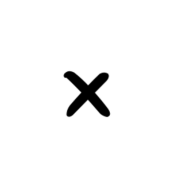

In [7]:
sample = (example_image + 1) / 2
print(sample.shape)
print(np.max(sample), np.min(sample))
transpose = np.transpose(sample, (1, 2, 0))
plot_single_image(transpose)

In [10]:
a_images = []

a_save_dir = "./a_images.npy"
b_save_dir = "./b_images.npy"

a_dir = "./data/fonts/train/a/"
b_dir = "./data/fonts/train/b/"

if os.path.exists(a_save_dir) and os.path.exists(b_save_dir):
    a_images = np.load(a_save_dir)
    b_images = np.load(b_save_dir)
    print("load from npy")
    print(a_images.shape)
    print(b_images.shape)
else: 
    a_images = []
    b_images = []

    for filename in os.listdir(a_dir):
        a = Image.open(a_dir + filename).convert("RGB")
        t_a = transform_image(a)
        a_images.append(t_a)

    for filename in os.listdir(b_dir):
        b = Image.open(b_dir + filename).convert("RGB")
        t_b = transform_image(b)
        b_images.append(t_b)

    np.save(a_save_dir, a_images)
    np.save(b_save_dir, b_images)


In [11]:
data_with_label = []

if len(a_images) != len(b_images):
    raise Exception("The numbers to not match")


for i in range(len(a_images)):
    data_with_label.append((a_images[i], b_images[i]))


batch_size = 1

dataloader = DataLoader(data_with_label, batch_size=batch_size , shuffle=True)

In [12]:
def plot_images(imgs, grid_size = 5):
    """
    imgs: vector containing all the numpy images
    grid_size: 2x2 or 5x5 grid containing images
    """
     
    fig = plt.figure(figsize = (8, 8))
    columns = rows = grid_size
    plt.title("Training Images")

    for i in range(1, columns*rows +1):
        plt.axis("off")
        fig.add_subplot(rows, columns, i)
        if i >= len(imgs):
            break
        plt.imshow(imgs[i])
    plt.show()
    plt.close()

In [13]:

def conv(c_in, c_out, k_size, stride=2, pad=1, bn=True, activation="relu"):
    layers = []

    # Conv layer
    layers.append(L.Conv2d(in_channels=c_in, out_channels=c_out, kernel_size=k_size,\
                            stride=stride, pad=pad, nobias=True))

    # Batch Normalization
    if bn:
        layers.append(L.BatchNorm())
    
    if activation == "lrelu":
        layers.append(F.leaky_relu)
    elif activation == "relu":
        layers.append(F.relu)
    elif activation == "tanh":
        layers.append(F.tanh)
    elif activation == "none":
        # this has been added to this model for Discrimiantor 
        layers.append(F.sigmoid)
        pass

    if use_gpu:
        seq = Sequential(*layers)
        seq.to_gpu()
        return seq
    else:
        return Sequential(*layers)

def deconv(c_in, c_out, k_size, stride=2, pad=1, bn=True, activation="lrelu", apply_dropout=False):
    layers = []

    # Deconv.
    layers.append(L.Deconv2d(in_channels=c_in, out_channels=c_out, kernel_size=k_size,\
                             stride=stride, pad=pad, nobias=True))

    if bn:
        layers.append(L.BatchNorm())
    
    
    if activation == "lrelu":
        layers.append(F.leaky_relu)
    elif activation == "relu":
        layers.append(F.relu)
    elif activation == "tanh":
        layers.append(F.tanh)
    elif activation == "none":
        pass

    if use_gpu:
        seq = Sequential(*layers)
        seq.to_gpu()
        return seq
    else:
        return Sequential(*layers)





In [14]:
class Cat(C.Function):
    '''
    dezeroにはcatが定義されていないので、chatgptに作ってもらった。
    '''
    def __init__(self, axis=0):
        self.axis = axis

    def forward(self, *inputs):
        z = xp.concatenate(inputs, axis=self.axis)
        return z

    def backward(self, gz):
        inputs = self.inputs
        gradients = []
        start_idx = 0

        for x in inputs:
            end_idx = start_idx + x.shape[self.axis]

            indices = [slice(None)] * gz.ndim
            indices[self.axis] = slice(start_idx, end_idx)

            gradients.append(gz[tuple(indices)])

            start_idx = end_idx

        return tuple(gradients)


def cat(inputs, axis=0):
    return Cat(axis=axis)(*inputs)

In [15]:


class Generator(Model):
    def __init__(self):
        super().__init__()
        self.conv1 = conv(3, 64, 4, bn=False, activation='lrelu')  # (B, 64, 128, 128)
        self.conv2 = conv(64, 128, 4, activation='lrelu')  # (B, 128, 64, 64)
        self.conv3 = conv(128, 256, 4, activation='lrelu')  # (B, 256, 32, 32)
        self.conv4 = conv(256, 512, 4, activation='lrelu')  # (B, 512, 16, 16)
        self.conv5 = conv(512, 512, 4, activation='lrelu') # (B, 512, 8, 8)
        self.conv6 = conv(512, 512, 4, activation='lrelu') # (B, 512, 4, 4)

        # Decoder
        self.deconv1 = deconv(512, 512, 4, activation='relu', apply_dropout=True) # (B, 512, 8, 8)
        self.deconv2 = deconv(512 * 2, 512, 4, activation='relu', apply_dropout=True)  # (B, 512, 16, 16) # Skip connection with concatenation or addition
        self.deconv3 = deconv(512 * 2, 256, 4, activation='relu', apply_dropout=True)  # (B, 256, 32, 32)
        self.deconv4 = deconv(256 * 2, 128, 4, activation='relu')  # (B, 128, 64, 64)
        self.deconv5 = deconv(128 * 2, 64, 4, activation='relu')  # (B, 64, 128, 128)
        self.deconv6 = deconv(64 * 2, 3, 4, bn=False, activation='tanh')  # (B, 3, 256, 256)    
    
    def forward(self, x):
        # Encoder
        c1 = self.conv1(x)
        c2 = self.conv2(c1)
        c3 = self.conv3(c2)
        c4 = self.conv4(c3)
        c5 = self.conv5(c4)
        c6 = self.conv6(c5)

        # Decoder
        d1 = F.dropout(self.deconv1(c6), dropout_ratio=0.5)
        d2 = F.dropout(self.deconv2(cat((d1, c5), axis=1)), dropout_ratio=0.5)
        d3 = F.dropout(self.deconv3(cat((d2, c4), axis=1)), dropout_ratio=0.5)
        d4 = self.deconv4(cat((d3, c3), axis=1))
        d5 = self.deconv5(cat((d4, c2), axis=1))
        d6 = self.deconv6(cat((d5, c1), axis=1))
        return d6

    def init_weight(self):
        for l in self.conv1.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv2.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv3.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv4.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv5.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv6.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        
        for l in self.deconv1.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.deconv2.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.deconv3.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.deconv4.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.deconv5.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.deconv6.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.0 * np.random.randn(*l.W.data.shape)


In [16]:
class Discriminator(Model):
    def __init__(self):
        super().__init__()
        self.conv1 = conv(6, 64, 4, bn=False, activation='lrelu')
        self.conv2 = conv(64, 128, 4, activation='lrelu')
        self.conv3 = conv(128, 256, 4, activation='lrelu')
        self.conv4 = conv(256, 512, 4, 1, 1, activation='lrelu')
        self.conv5 = conv(512, 1, 4, 1, 1, activation='none')

    def forward(self, input):
        # print(input.shape, "input shape")
        out1 = self.conv1(input)
        # print(out1.shape, "out shape 1")
        out2 = self.conv2(out1)
        # print(out2.shape, "out shape 2")
        out3 = self.conv3(out2)
        # print(out3.shape, "out shape 3")
        out4 = self.conv4(out3)
        # print(out4.shape, "out shape 4")
        out5 = self.conv5(out4)
        # print(out5.shape, "out shape 5")

        return out5

    def init_weight(self):
        for l in self.conv1.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv2.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv3.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv4.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)
        for l in self.conv5.layers:
            classname = l.__class__.__name__
            if classname.lower() in ('conv2d', 'linear', 'deconv2d'):
                l.W.data = 0.02 * np.random.randn(*l.W.data.shape)

In [33]:
gen = Generator()
dis = Discriminator()

# gen.init_weight()
# dis.init_weight()

if use_gpu:
    gen.to_gpu()
    dis.to_gpu()
    dataloader.to_gpu()

In [34]:
class MeanAbsoluteError(C.Function):
    def forward(self, x0, x1):
        diff = x0 - x1
        abs_diff = xp.absolute(diff.data)
        y = abs_diff.sum() / len(diff)
        return y

    def backward(self, gy):
        x0, x1 = self.inputs
        diff = x0 - x1
        grad_x0 = gy * xp.where(diff > 0, 1, -1) / len(diff)
        grad_x1 = -grad_x0
        return grad_x0, grad_x1

def mean_absolute_error(x0, x1):
    return MeanAbsoluteError().forward(x0, x1)


Epoch: [ 0], step: [20], loss_dis: [0.7509], loss_gen: [2.6800]


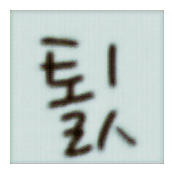

Epoch: [ 0], step: [40], loss_dis: [0.7412], loss_gen: [1.8712]


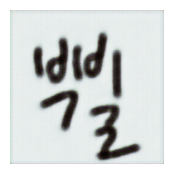

Epoch: [ 0], step: [60], loss_dis: [0.7358], loss_gen: [1.4259]


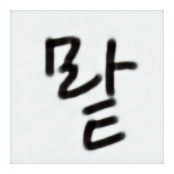

Epoch: [ 0], step: [80], loss_dis: [0.7287], loss_gen: [1.2717]


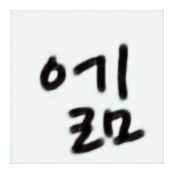

Epoch: [ 0], step: [100], loss_dis: [0.7290], loss_gen: [1.1625]


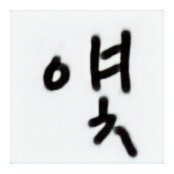

Epoch: [ 0], step: [120], loss_dis: [0.7380], loss_gen: [1.1511]


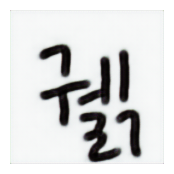

Epoch: [ 0], step: [140], loss_dis: [0.7273], loss_gen: [1.1313]


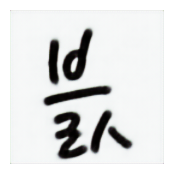

Epoch: [ 0], step: [160], loss_dis: [0.7210], loss_gen: [1.0764]


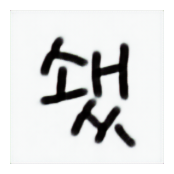

Epoch: [ 0], step: [180], loss_dis: [0.7307], loss_gen: [1.0797]


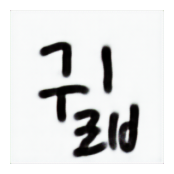

Epoch: [ 0], step: [200], loss_dis: [0.7266], loss_gen: [1.1171]


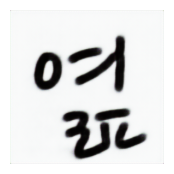

Epoch: [ 0], step: [220], loss_dis: [0.7319], loss_gen: [1.0677]


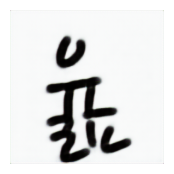

Epoch: [ 0], step: [240], loss_dis: [0.7124], loss_gen: [0.9853]


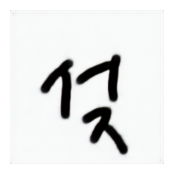

Epoch: [ 0], step: [260], loss_dis: [0.7175], loss_gen: [0.9886]


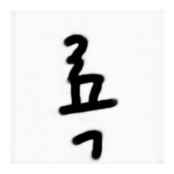

Epoch: [ 0], step: [280], loss_dis: [0.7224], loss_gen: [0.9580]


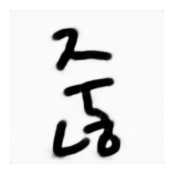

Epoch: [ 0], step: [300], loss_dis: [0.7213], loss_gen: [1.2449]


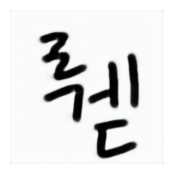

Epoch: [ 1], step: [20], loss_dis: [0.7182], loss_gen: [0.9958]


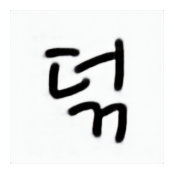

Epoch: [ 1], step: [40], loss_dis: [0.7173], loss_gen: [0.9895]


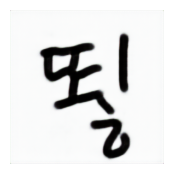

Epoch: [ 1], step: [60], loss_dis: [0.7210], loss_gen: [0.9604]


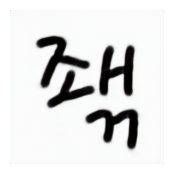

Epoch: [ 1], step: [80], loss_dis: [0.7176], loss_gen: [0.9733]


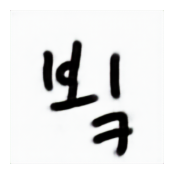

Epoch: [ 1], step: [100], loss_dis: [0.7305], loss_gen: [1.0526]


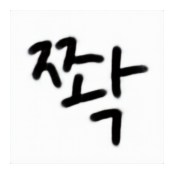

Epoch: [ 1], step: [120], loss_dis: [0.7382], loss_gen: [1.1737]


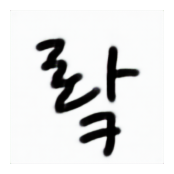

Epoch: [ 1], step: [140], loss_dis: [0.7181], loss_gen: [0.9861]


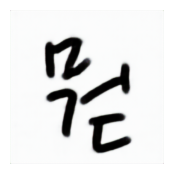

Epoch: [ 1], step: [160], loss_dis: [0.7162], loss_gen: [1.0454]


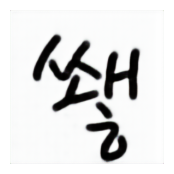

Epoch: [ 1], step: [180], loss_dis: [0.7636], loss_gen: [0.9028]


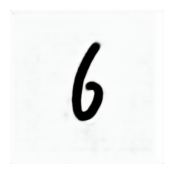

Epoch: [ 1], step: [200], loss_dis: [0.7173], loss_gen: [1.0048]


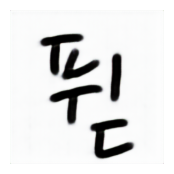

Epoch: [ 1], step: [220], loss_dis: [0.7107], loss_gen: [0.9566]


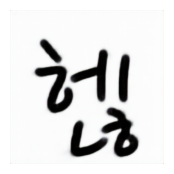

Epoch: [ 1], step: [240], loss_dis: [0.7280], loss_gen: [1.0348]


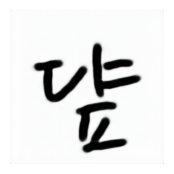

Epoch: [ 1], step: [260], loss_dis: [0.7160], loss_gen: [1.2701]


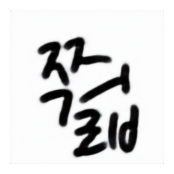

Epoch: [ 1], step: [280], loss_dis: [0.7212], loss_gen: [1.0554]


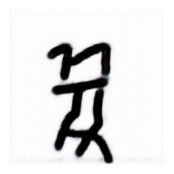

Epoch: [ 1], step: [300], loss_dis: [0.7320], loss_gen: [1.3135]


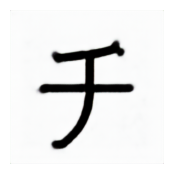

Epoch: [ 2], step: [20], loss_dis: [0.7225], loss_gen: [1.2413]


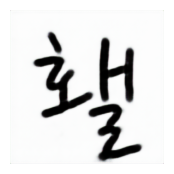

Epoch: [ 2], step: [40], loss_dis: [0.7201], loss_gen: [0.9709]


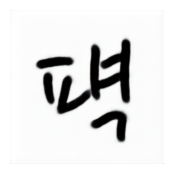

Epoch: [ 2], step: [60], loss_dis: [0.7192], loss_gen: [1.0246]


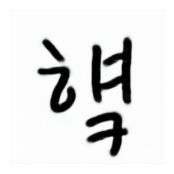

Epoch: [ 2], step: [80], loss_dis: [0.7273], loss_gen: [1.0241]


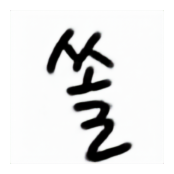

Epoch: [ 2], step: [100], loss_dis: [0.7231], loss_gen: [1.0228]


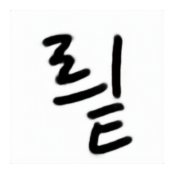

Epoch: [ 2], step: [120], loss_dis: [0.7263], loss_gen: [0.9275]


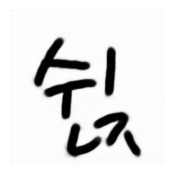

Epoch: [ 2], step: [140], loss_dis: [0.7164], loss_gen: [0.9763]


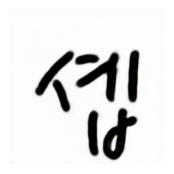

Epoch: [ 2], step: [160], loss_dis: [0.7101], loss_gen: [0.8877]


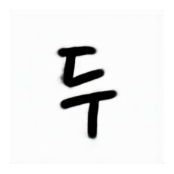

Epoch: [ 2], step: [180], loss_dis: [0.7189], loss_gen: [1.0117]


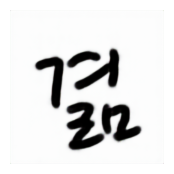

Epoch: [ 2], step: [200], loss_dis: [0.7202], loss_gen: [0.9522]


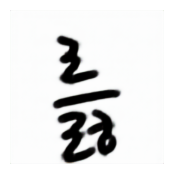

Epoch: [ 2], step: [220], loss_dis: [0.7098], loss_gen: [0.9668]


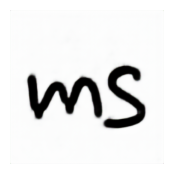

Epoch: [ 2], step: [240], loss_dis: [0.7234], loss_gen: [0.9110]


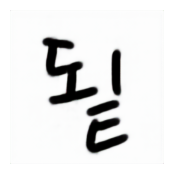

Epoch: [ 2], step: [260], loss_dis: [0.7073], loss_gen: [0.9339]


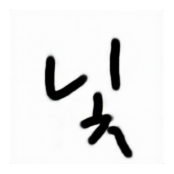

Epoch: [ 2], step: [280], loss_dis: [0.7142], loss_gen: [0.9793]


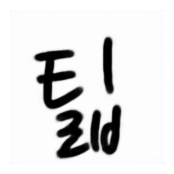

Epoch: [ 2], step: [300], loss_dis: [0.7173], loss_gen: [0.9024]


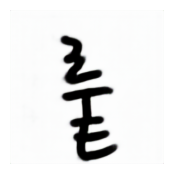

Epoch: [ 3], step: [20], loss_dis: [0.7161], loss_gen: [0.9420]


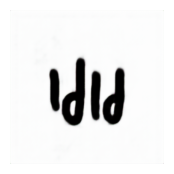

Epoch: [ 3], step: [40], loss_dis: [0.7179], loss_gen: [0.9858]


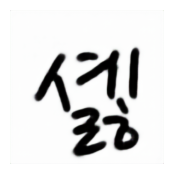

Epoch: [ 3], step: [60], loss_dis: [0.7214], loss_gen: [0.9808]


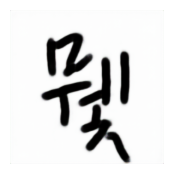

Epoch: [ 3], step: [80], loss_dis: [0.7116], loss_gen: [0.8953]


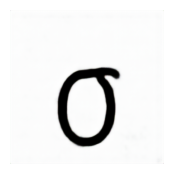

Epoch: [ 3], step: [100], loss_dis: [0.7144], loss_gen: [0.8511]


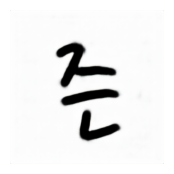

Epoch: [ 3], step: [120], loss_dis: [0.7205], loss_gen: [0.9110]


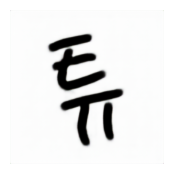

Epoch: [ 3], step: [140], loss_dis: [0.7114], loss_gen: [1.0235]


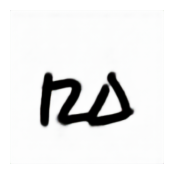

Epoch: [ 3], step: [160], loss_dis: [0.7161], loss_gen: [0.8897]


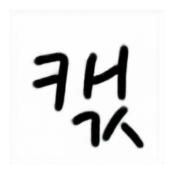

Epoch: [ 3], step: [180], loss_dis: [0.7164], loss_gen: [1.0089]


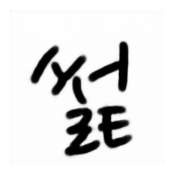

Epoch: [ 3], step: [200], loss_dis: [0.7171], loss_gen: [0.8582]


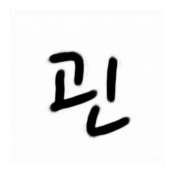

Epoch: [ 3], step: [220], loss_dis: [0.7147], loss_gen: [0.9747]


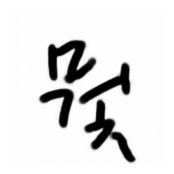

Epoch: [ 3], step: [240], loss_dis: [0.7170], loss_gen: [0.9862]


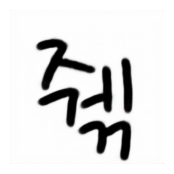

Epoch: [ 3], step: [260], loss_dis: [0.7086], loss_gen: [0.9764]


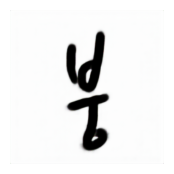

Epoch: [ 3], step: [280], loss_dis: [0.7227], loss_gen: [0.9803]


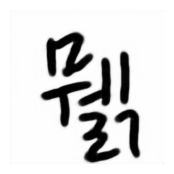

Epoch: [ 3], step: [300], loss_dis: [0.7107], loss_gen: [0.8232]


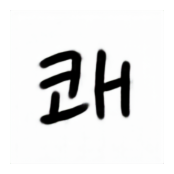

Epoch: [ 4], step: [20], loss_dis: [0.7201], loss_gen: [0.9420]


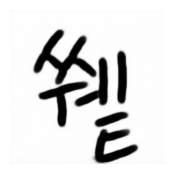

Epoch: [ 4], step: [40], loss_dis: [0.7145], loss_gen: [0.9005]


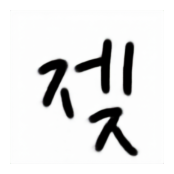

KeyboardInterrupt: 

In [35]:
max_epoch = 15

criterionL1 = mean_absolute_error
criterionMSE = F.mean_squared_error
criterionBCE = F.binary_cross_entropy

g_optimizer = Adam(alpha=0.0002, beta1=0.5, beta2=0.999).setup(gen)
d_optimizer = Adam(alpha=0.0002, beta1=0.5, beta2=0.999).setup(dis)

for epoch in range(max_epoch):
    cnt = 0
    for real_b, real_a in dataloader:
        cnt +=1

        # sample_a = cuda.as_numpy(real_a)[0].transpose(1, 2, 0)
        # sample_a = (sample_a + 1) / 2

        # sample_b = cuda.as_numpy(real_b)[0].transpose(1, 2, 0)
        # samble_b = (sample_b + 1) / 2

        # plot_single_image(sample_a)
        # plot_single_image(sample_b)
        # break

        batch_size = len(real_b)

        if len(real_b) != batch_size:
            continue

        fake_b = gen(real_a)


        # Train discriminator
        fake_ab = cat((real_a, fake_b), axis=1)
        pred_fake = dis(fake_ab)
        # print(max, min, "max min")
        # https://brstar96.github.io/devlog/mldlstudy/2019-05-13-what-is-patchgan-D/

        loss_dis_fake_mean = F.binary_cross_entropy(pred_fake, xp.zeros(pred_fake.shape).astype(int)) / (pred_fake.size / batch_size)
        # print(pred_fake_flattened.data, "pred fake flattened shape")
        # break
        # loss_dis_fake_mean = 0
        # # loss_dis_fake_mean = F.binary_cross_entropy(pred_fake_flattened, xp.zeros(pred_fake_flattened.shape).astype(int)) / pred_fake_flattened.size
        # for i in range(len(pred_fake_flattened)):
        #     item = pred_fake_flattened[i]
        #     # max = xp.max(item.data)
        #     # min = xp.min(item.data)
        #     # print(max, min, "max min")
        #     loss_dis_fake_mean += F.mean_squared_error(item, xp.zeros(len(item)).astype(int)) 
        #     # print(len(item))
        #     # print(loss_dis_fake_mean.data, "loss dis fake mean")
        #     # print("backward", loss_dis_fake_mean.backward())
        
        # train with real
        real_ab = cat((real_a, real_b), axis=1)
        pred_real = dis(real_ab)
        # loss_dis_real = F.mean_squared_error_simple(flattened_pred_real, xp.ones(flattened_pred_real.shape).astype(int))
        # loss_dis_real = ((pred_real - xp.ones(pred_real.shape).astype(int)) ** 2) 
        # loss_dis_real_mean = F.average(loss_dis_real)

        # pred_real_flattened = F.flatten(pred_real)

        loss_dis_real_mean = F.binary_cross_entropy(pred_real, xp.ones(pred_real.shape).astype(int)) / (pred_real.size / batch_size)
        # loss_dis_real_mean = 0
        # for i in range(len(pred_real_flattened)):
        #     item = pred_real_flattened[i]
        #     loss_dis_real_mean += F.mean_squared_error(item, xp.ones(item.shape).astype(int)) 
        #     # print(loss_dis_real_mean.data, "loss dis real mean")
        # # break

        # loss_dis_real_mean = F.binary_cross_entropy(pred_real, xp.ones(pred_real.shape).astype(int))
        # loss_dis_real = mean_squared_error(pred_real, xp.ones(pred_real.shape).astype(int))
        # print(loss_dis_fake.data, loss_dis_real.data, "loss dis fake real")
        # break
        # Combined loss
        loss_dis = (loss_dis_fake_mean + loss_dis_real_mean) * 0.5

        # Backprop + Optimize 
        dis.cleargrads()
        gen.cleargrads()
        loss_dis.backward()
        d_optimizer.update()

        # Train generator
        # first g(a) should fake the discriminator
        fake_ab = cat((real_a, fake_b.data), axis=1)
        pred_fake = dis(fake_ab)
        # flattened_pred_fake = F.flatten(pred_fake)[0]
        # loss_gen_fake = F.mean_squared_error_simple(flattened_pred_fake, xp.ones(flattened_pred_fake.shape).astype(int))
        # loss_gen_fake = ((pred_fake - xp.ones(pred_fake.shape).astype(int)) ** 2)
        # loss_gen_fake_mean = F.average(loss_gen_fake)


        # pred_fake_flattened = F.flatten(pred_fake)
        # loss_gen_fake_mean = 0
        loss_dis_fake_mean = F.binary_cross_entropy(pred_fake, xp.ones(pred_fake.shape).astype(int)) / (pred_fake.size / batch_size)
        # for i in range(len(pred_fake_flattened)):
        #     item = pred_fake_flattened[i]
        #     loss_gen_fake_mean += F.mean_squared_error(item, xp.ones(item.shape).astype(int))


        loss_gen_l1_mean = F.mean_squared_error(fake_b, real_b) / (fake_b.size / batch_size)

        # loss_gen = loss_gen_fake + loss_gen_l1
        loss_gen = loss_dis_fake_mean + loss_gen_l1_mean * 10

        # Backprop + Optimize
        gen.cleargrads()
        dis.cleargrads()
        
        loss_gen.backward()
        g_optimizer.update()

        if cnt % 20 == 0:
            print("Epoch: [%2d], step: [%2d], loss_dis: [%.4f], loss_gen: [%.4f]" % (epoch, cnt, loss_dis.data, loss_gen.data))
            # skeleton = real_a
            # print(skeleton.shape)
            # skeleton = cuda.as_numpy(skeleton)
            # skeleton = skeleton[0].transpose(1, 2, 0)
            # skeleton = (skeleton + 1) / 2
            # plot_single_image(skeleton)
            array = cuda.as_numpy(fake_b.data)
            sample = array[0].transpose(1, 2, 0)
            sample = (sample + 1) / 2
            plot_single_image(sample)
            plt.show()
            plt.close()
        
        if cnt > 300:
            break
        


In [36]:
# save model
gen.save_weights(".nanum_font_gen.npz")